In [1]:
# import statement
from groq import Groq
from openai import OpenAI
from utils import stt_test, plot_model_comparison
import time
import os
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# parameters initialization
groq_client = Groq(
    api_key=os.environ["GROQ_API_KEY"],
)

openai_client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

models = ["whisper", "nova-2-general", "whisper-large-v3", "whisper-1"]

local_audios = [
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound0.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound1.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound2.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound3.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound4.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound5.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound6.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound7.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound8.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound9.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound10.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound11.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound12.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound13.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound14.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound15.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound16.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound17.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound18.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound19.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound20.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound21.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound22.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound23.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound24.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound25.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound26.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound27.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound28.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound29.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound30.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound31.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound32.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound33.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound34.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound35.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound36.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound37.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound38.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound39.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound40.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/tts_sound41.mp3",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty0.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty1.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty2.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty0.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty1.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty2.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty0.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty1.m4a",
    "/Users/haozheli/Coding/LLM-Comparison/stt_testing_data/empty2.m4a",
]

testing_texts = [
    "This is a test sentence.",
    "测试文本。",
    "これはテストです。",
    "The quick brown fox jumps over the lazy dog.",
    "今天天气很好。",
    "昨日の天気はとても良かったです。",
    "Artificial intelligence is transforming industries.",
    "机器学习是人工智能的一个分支。",
    "機械学習は人工知能の一分野です。",
    "Language models like GPT-4 are very powerful.",
    "人类已经踏上了火星。",
    "人類は既に火星に足を踏み入れています。",
    "I have a dream that one day this nation will rise up and live out the true meaning of its creed.",
    "明天我们去爬山吧。",
    "明日は山登りに行こう。",
    "The history of the world is the history of great men.",
    "这个项目的进展非常顺利。",
    "このプロジェクトの進捗は非常に順調です。",
    "In a hole in the ground there lived a hobbit.",
    "我们可以通过学习变得更好。",
    "学ぶことによって私たちは良くなります。",
    "The greatest glory in living lies not in never falling, but in rising every time we fall.",
    "在追求梦想的道路上，我们不应轻言放弃。",
    "夢を追い求める道のりでは、簡単に諦めるべきではありません。",
    "To be, or not to be, that is the question.",
    "每个人都有自己的梦想。",
    "誰もが自分の夢を持っています。",
    "Success is not final, failure is not fatal: It is the courage to continue that counts.",
    "人生は短い、だから夢を追いかけるべきです。",
    "生活是一场冒险，要敢于尝试新事物。",
    "Some are born great, some achieve greatness, and some have greatness thrust upon them.",
    "时间是最宝贵的财富。",
    "時間は最も貴重な財産です。",
    "The only thing we have to fear is fear itself.",
    "为了更美好的明天，我们必须努力奋斗。",
    "より良い明日のために、私たちは懸命に働かなければなりません。",
    "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.",
    "好奇心是知识的起点。",
    "好奇心は知識の始まりです。",
    "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness.",
    "成功的道路充满挑战，但每一步都值得。",
    "成功への道は挑戦に満ちていますが、一歩一歩が価値があります。",
    "",
    "",
    "",
    "",
    "",
    "",
    "",
    "",
    ""
]

assert(len(local_audios) == len(testing_texts))

This is a test sentence. this is a test sentence
测试文本。 测 试 文 本
これはテストです。 これは テ スト です
The quick brown fox jumps over the lazy dog. the quick brown fox jumps over the lazy dog
今天天气很好。 今天 天 氣 很好
昨日の天気はとても良かったです。 き い の ち ん き ゅ え と て う ま かった り
Artificial intelligence is transforming industries. artificial intelligence is transforming industries
机器学习是人工智能的一个分支。 极 其 学 习 是 人 工 智 能 的 一个 分 支
機械学習は人工知能の一分野です。 機 械 学 習 は 人 工 知 能 の 一 分 野 です
Language models like GPT-4 are very powerful. language models like gpt-4 are very powerful
Test number: 10, stop to prevent rate limit
人类已经踏上了火星。 人 類 已經 踏 上 了 火 星
人類は既に火星に足を踏み入れています。 人 類 は す で に 火 星 に 足 を 踏 み 入 れて います 。
I have a dream that one day this nation will rise up and live out the true meaning of its creed. i have a dream that one day this nation will rise up and live out the true meaning of its creed
明天我们去爬山吧。 明 天 我们 去 爬 山 吧
明日は山登りに行こう。 明 日 は 山 盛 り に 行 こう
The history of the world is the history of great men. the history of the world is the history of gre

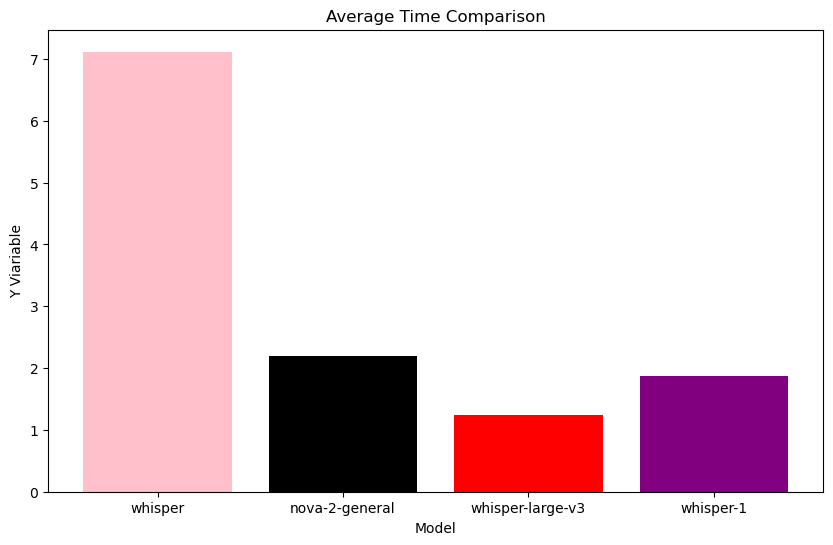

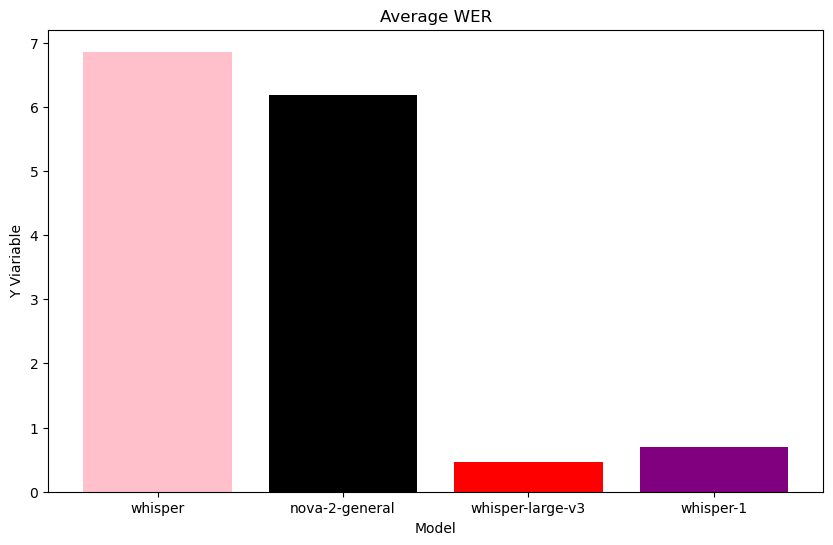

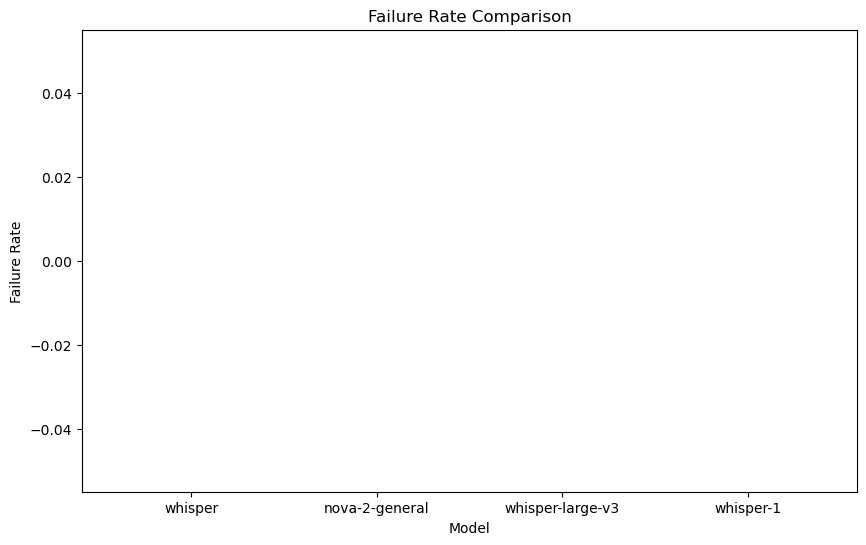

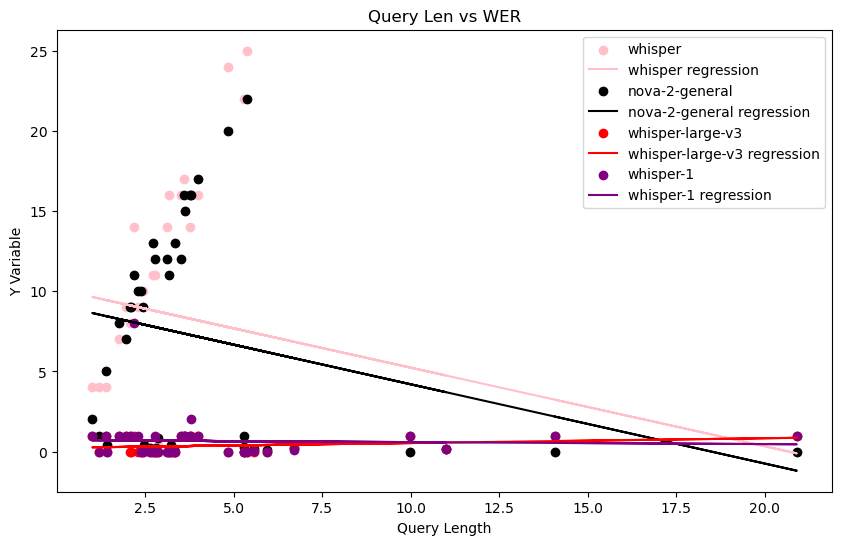

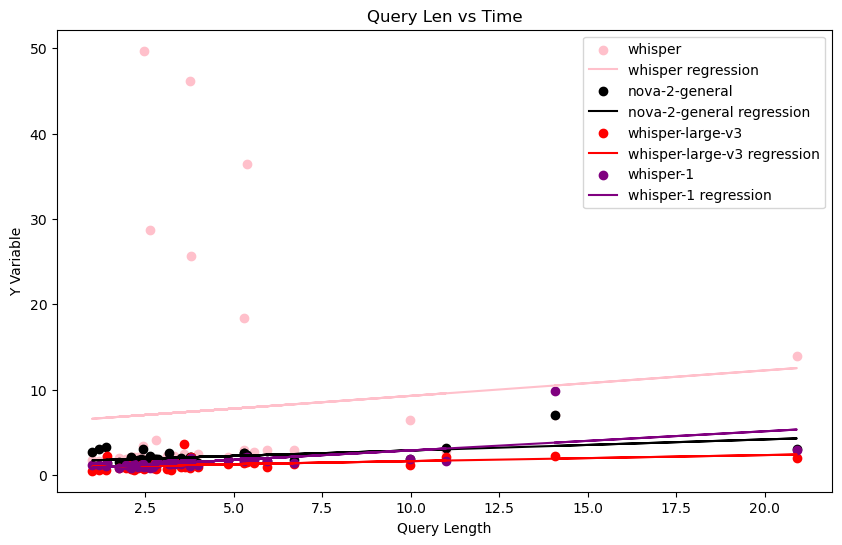

Model: whisper
Average time: 7.116141641841216
Average wer: 6.856422251015677
Fail rate: 0.0
Overall query: 277.232
Model: nova-2-general
Average time: 2.199721504660214
Average wer: 6.178551102556294
Fail rate: 0.0
Overall query: 277.232
Model: whisper-large-v3
Average time: 1.2456307551440071
Average wer: 0.4641339869281046
Fail rate: 0.0
Overall query: 277.232
Model: whisper-1
Average time: 1.8660491260827756
Average wer: 0.694862552864283
Fail rate: 0.0
Overall query: 277.232


In [3]:
# main testing function
results = []
for model in models:
    client = openai_client if "-1" in model else groq_client
    result = stt_test(local_audios, testing_texts, client, model)
    results.append(result)
    print(f"Finished testing {model}, waiting for 1 second...")
    time.sleep(1)


plot_model_comparison(results)
for result in results:
    print(f"Model: {result['model']}")
    print(f"Average time: {result['avg_time']}")
    print(f"Average wer: {result['avg_wer']}")
    print(f"Fail rate: {result['fail'] / (result['fail'] + result['success'])}")
    print(f"Overall query: {result['overall_query']}")